In [1]:
import pandas as pd
import numpy as np

**Initial Checking**

In [2]:
data = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
data.head()
data.info()
data.shape
data.isnull().sum()    #checking null values

#As we can see there is no missing value and there is no need the to change the datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Exploratory Data Analysis (EDA)**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


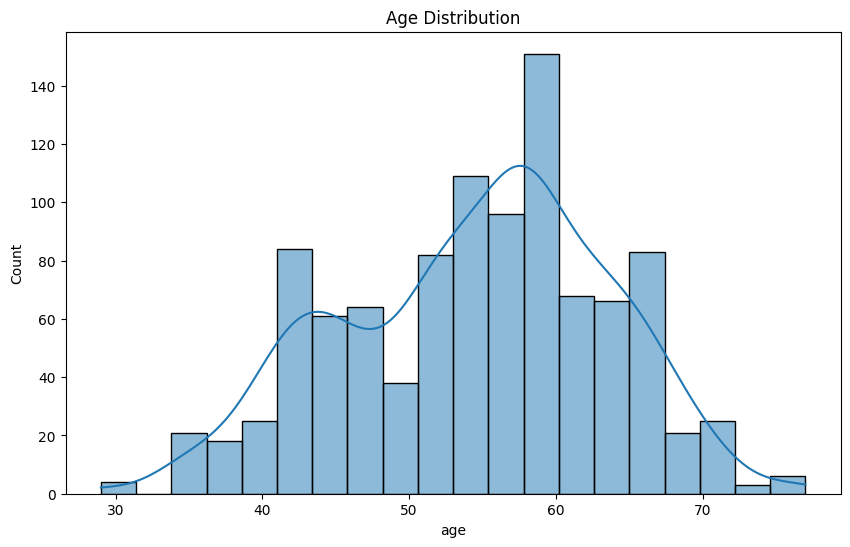

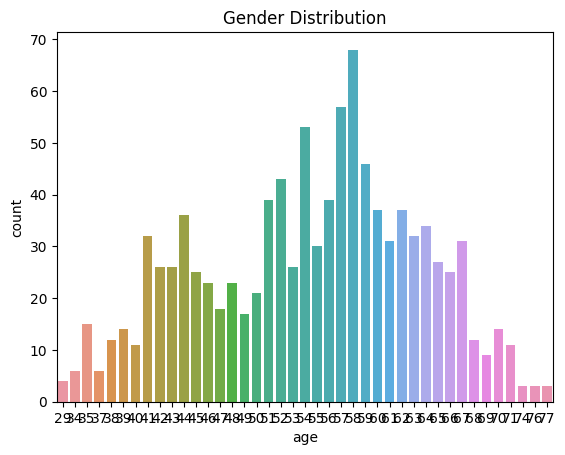

In [3]:
data.describe()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
sns.histplot(data['age'],bins = 20 , kde = True)
plt.title("Age Distribution")
plt.show()


sns.countplot( x = 'age', data = data)
plt.title("Gender Distribution")
plt.show()

**Outlier detection**

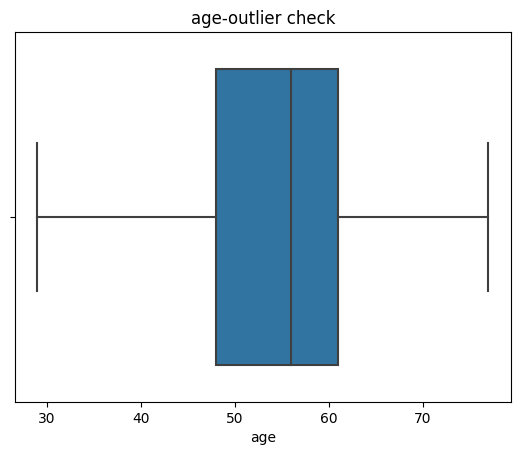

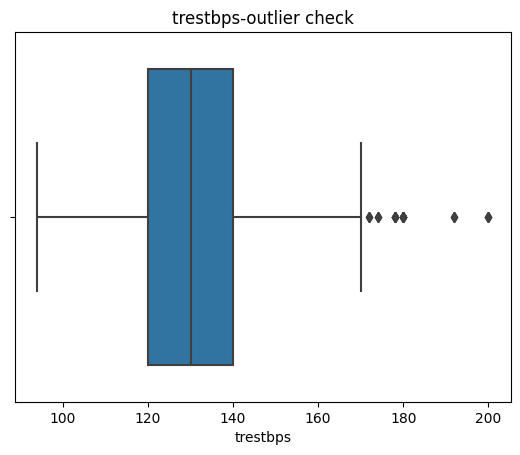

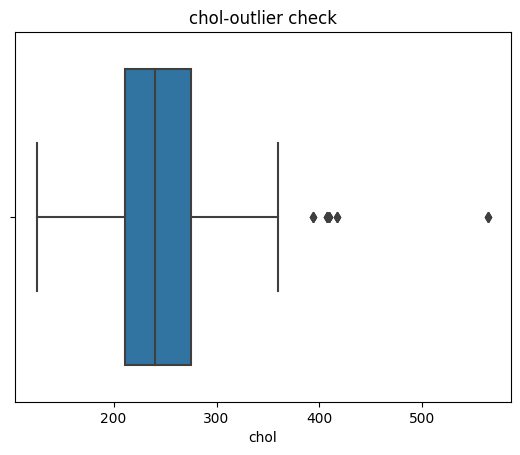

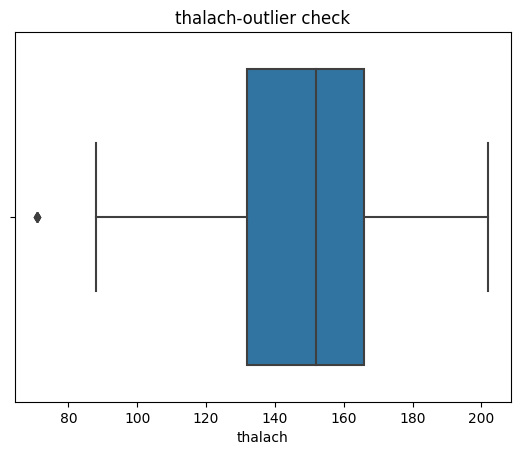

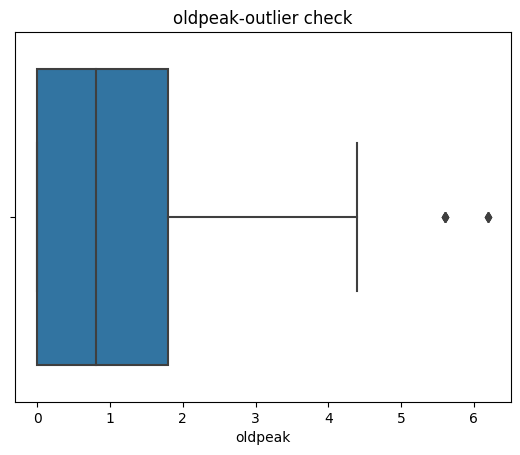

In [4]:
for col in ['age','trestbps','chol','thalach','oldpeak']:
    sns.boxplot(x=data[col])
    plt.title(f"{col}-outlier check")
    plt.show()

# **Basic_level_question**

**Q1. Average age of patients**

In [5]:
data['age'].mean()

54.43414634146342

**Q2. Gender distribution**

<Axes: xlabel='sex', ylabel='count'>

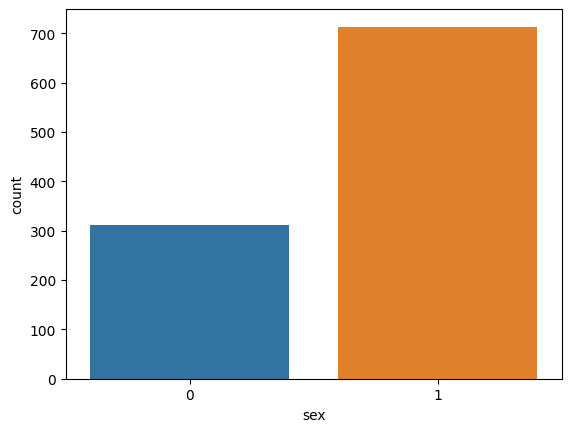

In [6]:
data['sex'].value_counts()
sns.countplot(x='sex',data = data)          #count(0) means female and count(1)means male

**Q3. Average resting blood pressure**

In [7]:
data['trestbps'].mean()

131.61170731707318

**Q4. Patients with fasting blood sugar > 120**

In [8]:
(data['fbs'] == 1).sum()


153

**Q5. Types of chest pain**

<Axes: xlabel='cp', ylabel='count'>

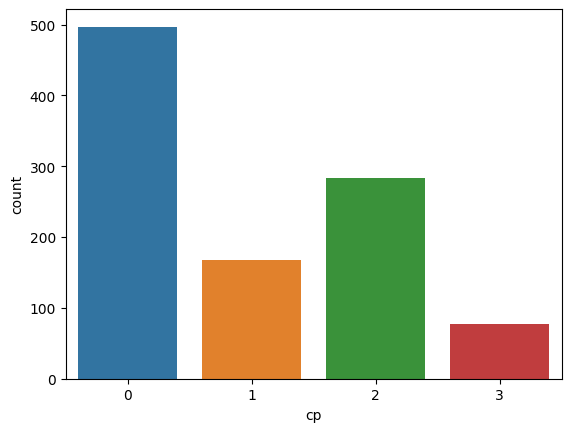

In [9]:
data['cp'].unique()
data['cp'].value_counts()
sns.countplot(x = 'cp',data = data)

**Q6. Maximum heart rate achieved**

In [10]:
data['thalach'].max()

202

**Q7. Percentage with exercise-induced angina**

In [11]:
data['exang'].mean()*100

33.65853658536586

**Q8. Average cholesterol level**

In [12]:
data['chol'].mean()

246.0

**Q9. Patients with ECG result = 2**

In [13]:
(data['restecg']==2).sum()

15

**Q10. Distribution of vessels (ca)**

<Axes: xlabel='ca', ylabel='count'>

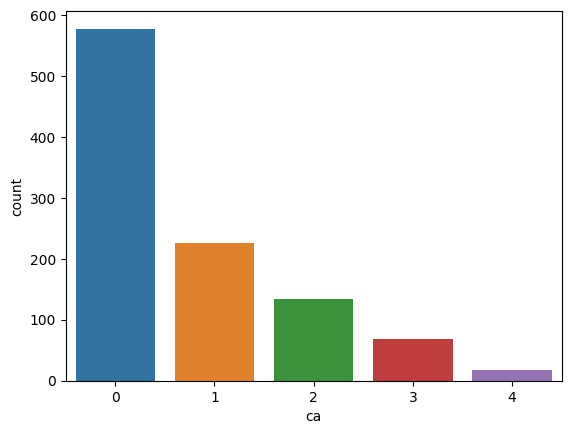

In [14]:
data['ca'].value_counts()
sns.countplot( x ='ca', data = data)

# **Medium level Question**

**Q1. Correlation between age and cholesterol**

In [15]:
data[['age','chol']].corr()

,age,chol
age,1.000000,0.219823
chol,0.219823,1.000000


**Q2. Distribution of chest pain types across age groups**

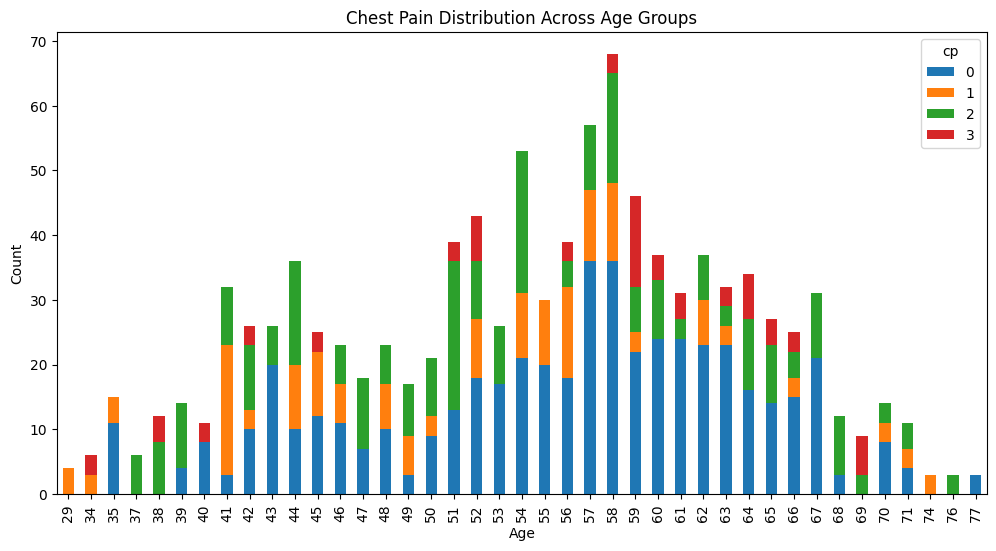

In [16]:
data.groupby('age')['cp'].value_counts().unstack().plot(
    kind='bar', stacked=True, figsize=(12,6))
plt.title("Chest Pain Distribution Across Age Groups")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


**Q3. Maximum heart rate vs exercise-induced angina**

In [17]:
data.groupby('exang')['thalach'].mean()          #exang = 1 → exercise-induced angina present
                                                 #exang = 0 → no angina

exang
0    155.342647
1    136.837681
Name: thalach, dtype: float64

**Q4. Difference in resting blood pressure between males & females**

In [18]:
print(data.groupby('sex')['trestbps'].mean())        #Mean comparison

from scipy.stats import ttest_ind
male_bp = data[data['sex']==1]['trestbps']           # Statistical test (t-test)
female_bp = data[data['sex']==0]['trestbps']
t_stat, p_val = ttest_ind(male_bp, female_bp)
print("T-test Statistic:", t_stat, "P-value:", p_val)

sex
0    133.701923
1    130.697055
Name: trestbps, dtype: float64
T-test Statistic: -2.533840303766843 P-value: 0.011430321504680553


**Q5. Fasting blood sugar vs heart disease presence**

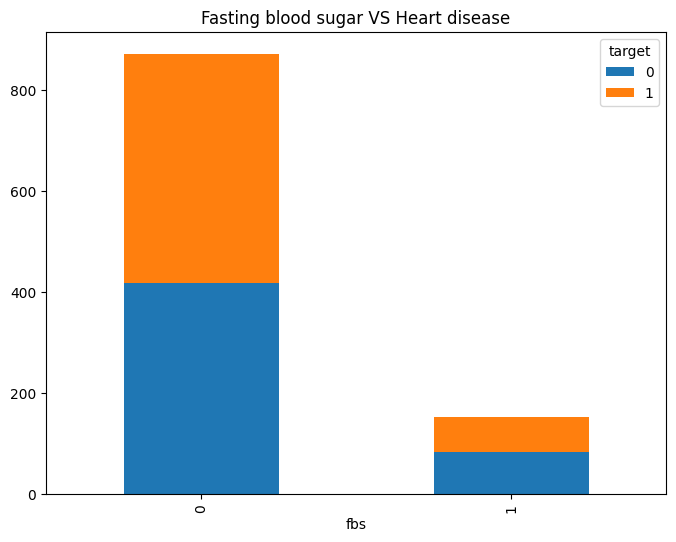

In [19]:
pd.crosstab(data['fbs'],data['target']).plot(
    kind = 'bar', stacked = True , figsize = (8,6))
plt.title("Fasting blood sugar VS Heart disease")
plt.show()

**Q6. Major vessels (ca) vs target**

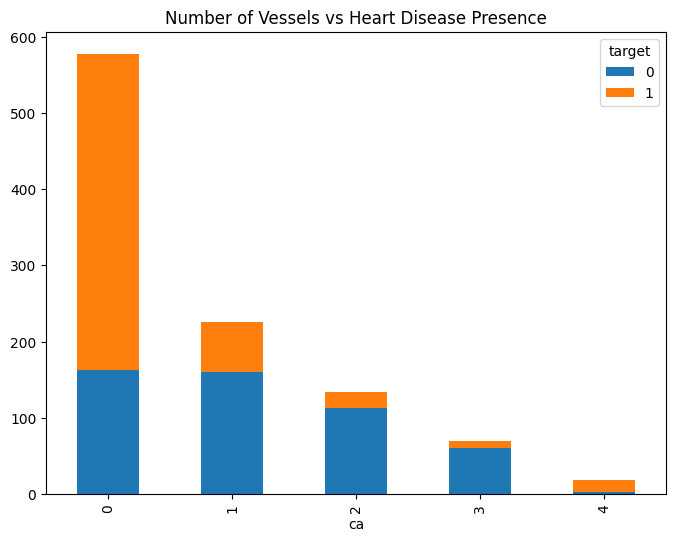

In [20]:
pd.crosstab(data['ca'], data['target']).plot(
    kind='bar', stacked=True, figsize=(8,6))
plt.title("Number of Vessels vs Heart Disease Presence")
plt.show()


**Q7. Average oldpeak value by chest pain type**

In [21]:
data.groupby('cp')['oldpeak'].mean()

cp
0    1.438833
1    0.323952
2    0.784507
3    1.380519
Name: oldpeak, dtype: float64

**Q8. Distribution of thalassemia (thal) among patients with disease**

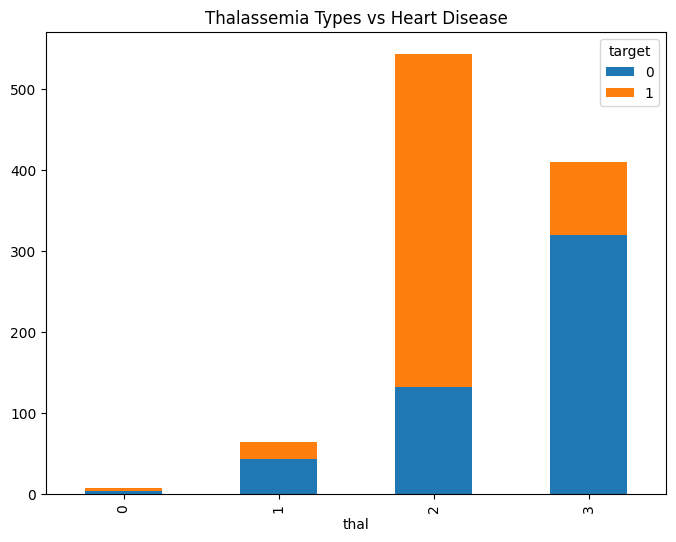

In [22]:
pd.crosstab(data['thal'], data['target']).plot(
    kind='bar', stacked=True, figsize=(8,6))
plt.title("Thalassemia Types vs Heart Disease")
plt.show()


**Q9. Most common combinations of risk factors**

In [23]:
risk_factors = (data[data['target']==1]
                .groupby(['cp','fbs','exang','thal'])
                .size()
                .reset_index(name='counts')
                .sort_values(by='counts', ascending=False))
print(risk_factors.head(10))

    cp  fbs  exang  thal  counts
15   2    0      0     2     133
8    1    0      0     2      97
1    0    0      0     2      73
19   2    1      0     2      32
16   2    0      0     3      19
4    0    0      1     2      18
23   3    0      0     2      16
9    1    0      0     3      15
17   2    0      1     2      13
24   3    0      0     3      10


**Q10. Pairwise comparison of clinical measurements**

Patients with Heart Disease:
              age         sex          cp    trestbps        chol         fbs  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean    52.408745    0.570342    1.378327  129.245247  240.979087    0.134981   
std      9.631804    0.495498    0.945881   16.112188   53.010345    0.342029   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     44.000000    0.000000    1.000000  120.000000  208.000000    0.000000   
50%     52.000000    1.000000    2.000000  130.000000  234.000000    0.000000   
75%     59.000000    1.000000    2.000000  140.000000  265.750000    0.000000   
max     76.000000    1.000000    3.000000  180.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean     0.598859  158.585551    0.134981    0.569962    1.593156    0.370722  

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

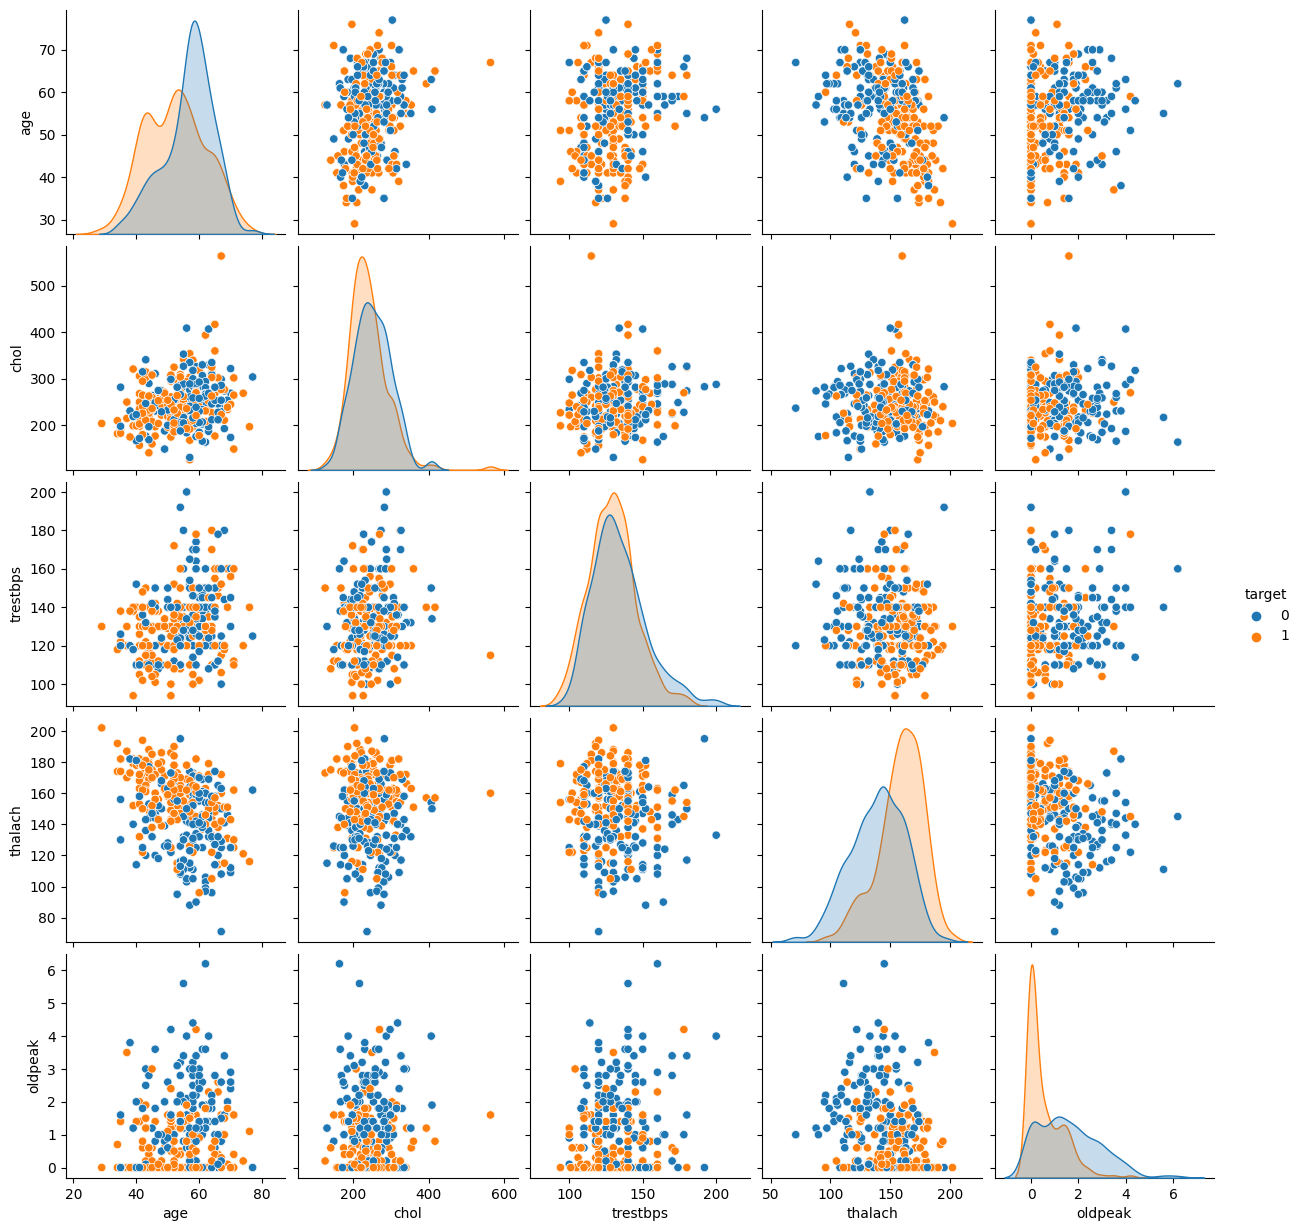

In [24]:
print("Patients with Heart Disease:")
print(data[data['target']==1].describe())

print("Patients without Heart Disease:")
print(data[data['target']==0].describe())

# Visualization
sns.pairplot(data, hue='target', vars=['age','chol','trestbps','thalach','oldpeak'])
plt.show()

# **Advance level question**

**Q1. Combined effect of risk factors (age, chol, bp)**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

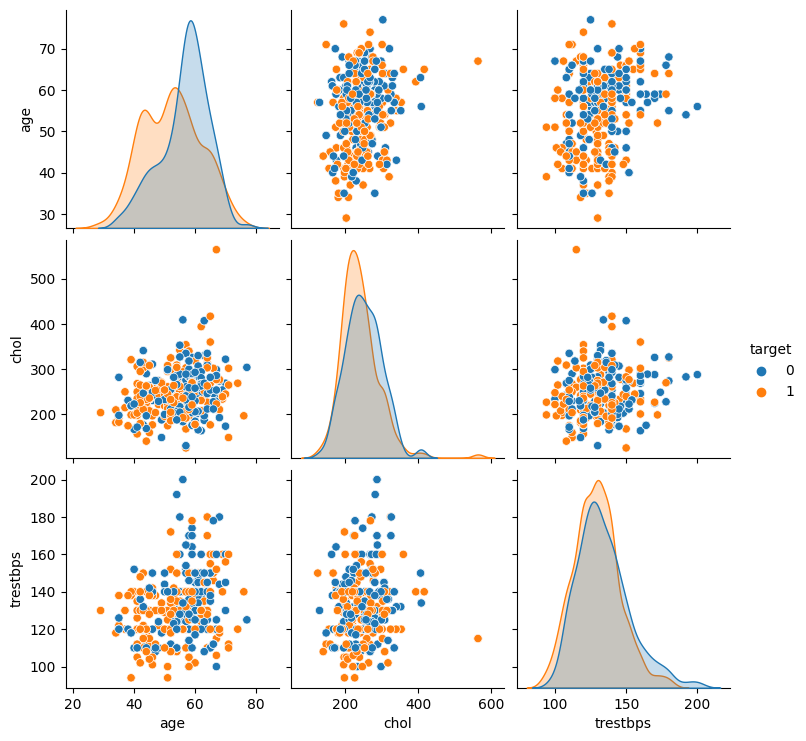

In [25]:
sns.pairplot(data, hue='target', vars=['age','chol','trestbps'])
plt.show()


**Q2. Strongest correlation with heart disease**

In [26]:
data.corr()['target'].sort_values(ascending = False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

**Q3. Logistic Regression Model**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

x= data.drop('target',axis = 1)
y = data['target']

x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size =0.2 , random_state = 42)

model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7951219512195122
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



**Q4. Variation of slope across chest pain types**

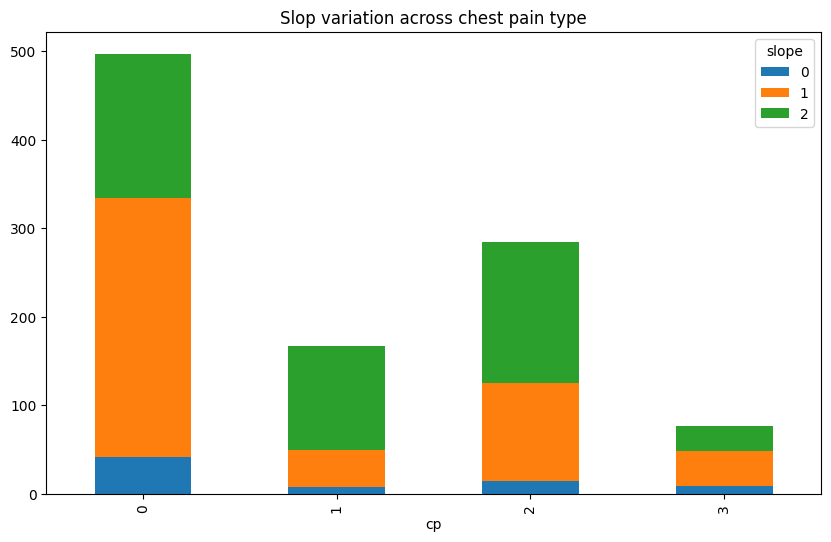

In [28]:
data.groupby('cp')['slope'].value_counts().unstack().plot(
    kind = 'bar',stacked = True , figsize = (10,6))
plt.title('Slop variation across chest pain type')
plt.show()

**Q5. Survival-like analysis of thal types**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

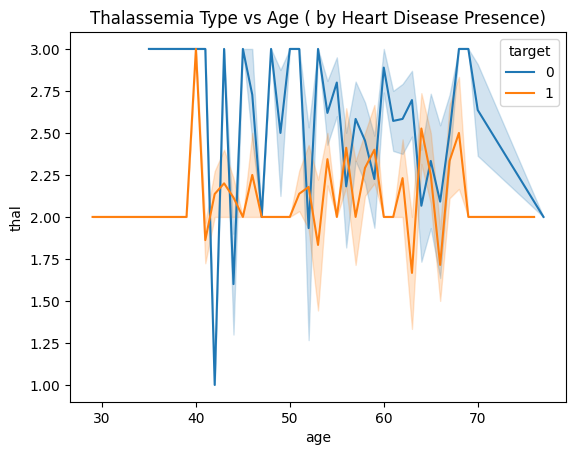

In [29]:
sns.lineplot(x='age',y='thal',hue='target',data=data)
plt.title("Thalassemia Type vs Age ( by Heart Disease Presence)")
plt.show()